In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW)1.csv")
df.head()

,Area,Item,Year,Unit,Losses,Production,Loss Percentage
0,Afghanistan,Rice and products,Y2010,1000 tonnes,47.0,672.0,6.99
1,Afghanistan,Rice and products,Y2011,1000 tonnes,47.0,672.0,6.99
2,Afghanistan,Rice and products,Y2012,1000 tonnes,35.0,500.0,7.00
3,Afghanistan,Rice and products,Y2013,1000 tonnes,36.0,512.0,7.03
4,Afghanistan,Rice and products,Y2014,1000 tonnes,36.0,537.0,6.70


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df['Year'] = df['Year'].str.replace('Y', '').astype(int)
forecast_years = range(2024, 2035)


In [ ]:
# Group the original DataFrame by 'Area' and forecast for each area separately
for area, data_group in df.groupby('Area'):
    if len(data_group) < 3:  # Adjust the threshold as needed
        continue  # Skip areas with insufficient data for modeling

    model = ARIMA(data_group['Loss Percentage'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast 'Loss Percentage' for the future years
    forecast_values = model_fit.forecast(steps=len(forecast_years))

    # Create a DataFrame for forecasted data for this area
    forecast_data_area = pd.DataFrame({'Year': forecast_years, 'Loss Percentage': forecast_values, 'Area': area})

    # Concatenate the forecasted data for this area to the overall forecast_data_all
    forecast_data_all = pd.concat([forecast_data_all, forecast_data_area], ignore_index=True)

c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ProUser\App

In [ ]:
forecast_data_all['Loss Percentage'] = forecast_data_all['Loss Percentage'].round(2)
forecast_data_all.to_csv("forecasted_loss_percentage.csv", index=False)


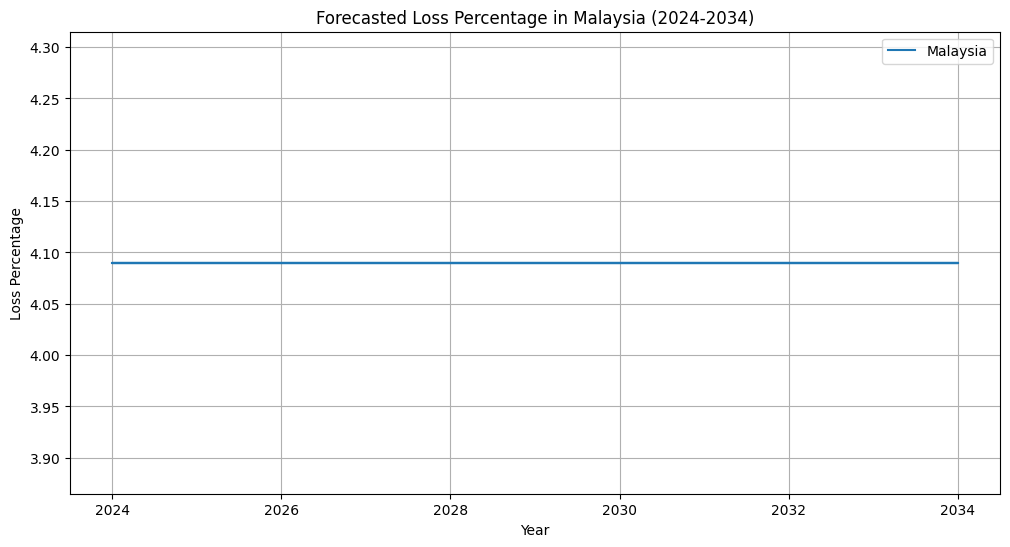

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/forecasted_loss_percentage.csv")
msia = data[data['Area'] == 'Malaysia']
# Sample code for data visualization
plt.figure(figsize=(12, 6))
for area, data_group in msia.groupby('Area'):
    plt.plot(data_group['Year'], data_group['Loss Percentage'], label=area)

plt.title('Forecasted Loss Percentage in Malaysia (2024-2034)')
plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
msia["Loss Percentage"].unique()

array([4.09])

In [ ]:
msia = forecast_data_all[forecast_data_all['Area'] == 'Malaysia']
# Sample code for data visualization
plt.figure(figsize=(12, 6))
for area, data_group in msia.groupby('Asia'):
    plt.plot(data_group['Year'], data_group['Loss Percentage'], label=area)

plt.title('Forecasted Loss Percentage in Malaysia (2024-2034)')
plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.legend()
plt.grid(True)
plt.show()